<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/funky_fibonacci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

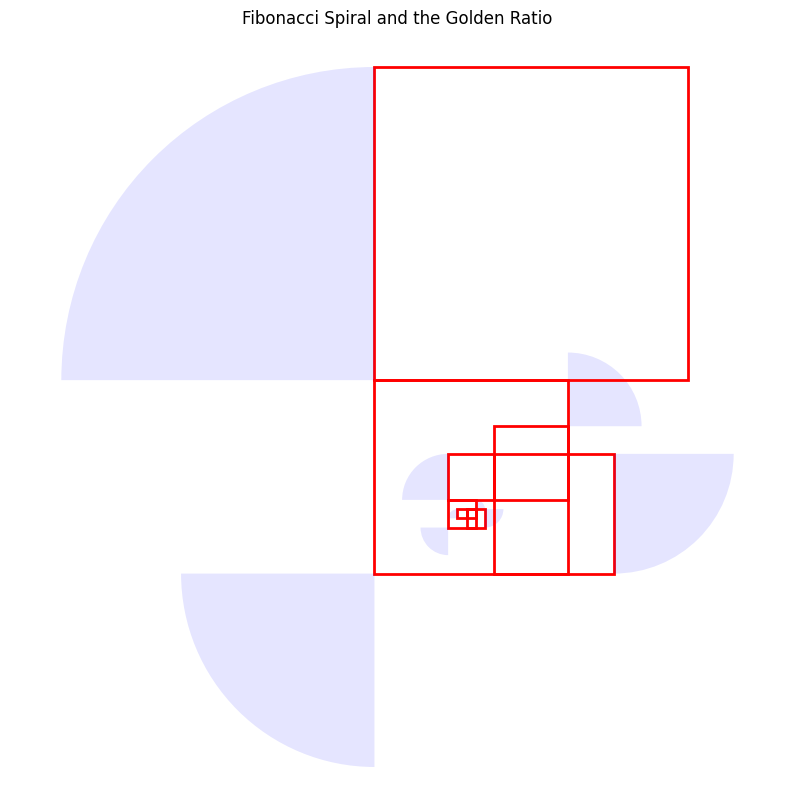

In [7]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np

def fibonacci_sequence(n):
    """ Generate Fibonacci sequence up to the n-th term """
    sequence = [0, 1]
    for i in range(2, n):
        sequence.append(sequence[-1] + sequence[-2])
    return sequence

def plot_fibonacci_spiral(fib_sequence):
    """ Plot the Fibonacci spiral with the correct usage of the Wedge function """
    # Initialize the plot
    plt.figure(figsize=(10, 10))
    x, y = 0, 0
    direction = 90  # Start direction: "up"

    for i, fib_num in enumerate(fib_sequence[1:]):
        if direction == 90:
            x, y = x, y + fib_sequence[i]
        elif direction == 0:
            x, y = x + fib_sequence[i], y
        elif direction == 270:
            x, y = x, y - fib_sequence[i]
        elif direction == 180:
            x, y = x - fib_sequence[i], y

        # Draw the square
        plt.gca().add_patch(plt.Rectangle((x, y), fib_num, fib_num, fill=None, edgecolor='r', lw=2))

        # Draw the quarter-circle
        center = (x, y) if direction in [90, 180] else (x + fib_num, y + fib_num)
        theta1, theta2 = direction, direction + 90
        wedge = patches.Wedge(center, fib_num, theta1, theta2, facecolor='blue', alpha=0.1)
        plt.gca().add_patch(wedge)

        # Update the direction
        direction = (direction - 90) % 360

    # Add annotations for the Golden Ratio
    ##plt.text(-0.5, -0.5, "As n increases, ratio of consecutive Fibonacci numbers approaches φ (Golden Ratio)",
    ##         fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))

    # Final plot adjustments
    plt.axis('equal')
    plt.axis('off')
    plt.title('Fibonacci Spiral and the Golden Ratio')
    plt.show()

# Generate Fibonacci sequence and plot the spiral
num_terms = 10
fib_sequence = fibonacci_sequence(num_terms)
plot_fibonacci_spiral(fib_sequence)


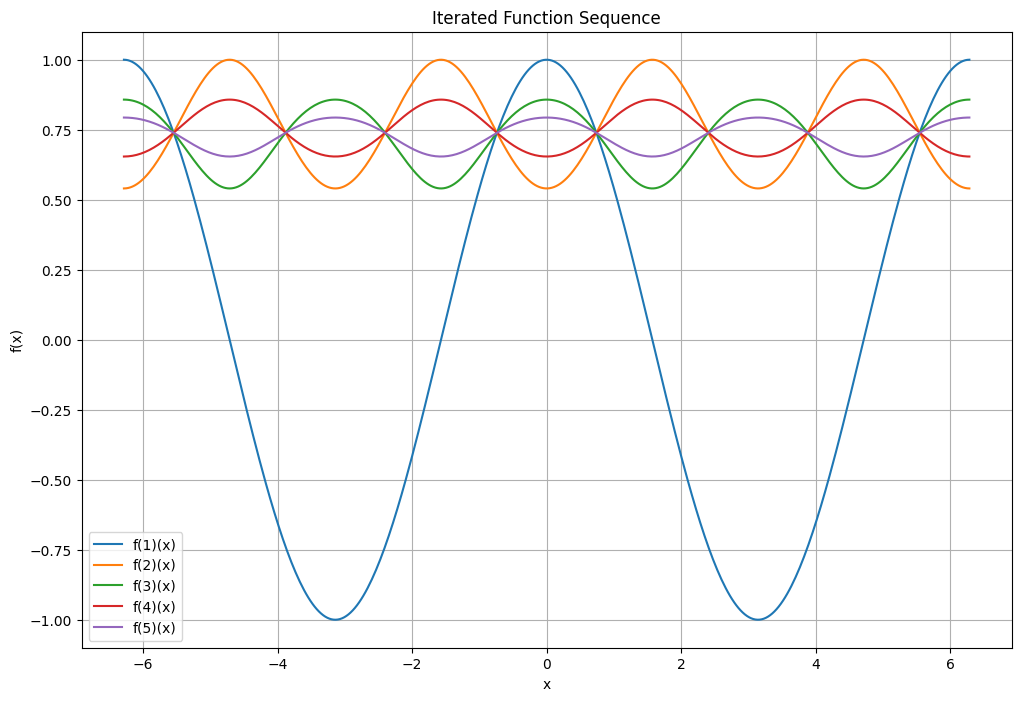

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def iterated_function_sequence(base_func, num_terms, x_range):
    """ Generate and plot an iterated function sequence """
    x = np.linspace(*x_range, 400)
    current_func = base_func

    plt.figure(figsize=(12, 8))

    for i in range(num_terms):
        y = current_func(x)
        plt.plot(x, y, label=f'f({i+1})(x)')

        # Update the function for the next term
        current_func = lambda x, func=current_func: base_func(func(x))

    plt.title("Iterated Function Sequence")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example with cosine function
base_func = np.cos
num_terms = 5
x_range = (-2*np.pi, 2*np.pi)  # Range of x values
iterated_function_sequence(base_func, num_terms, x_range)


In [9]:
from scipy.optimize import fsolve

def find_fixed_points(func, start_points):
    """ Find fixed points of a function """
    fixed_points = []
    for point in start_points:
        # Find a solution to func(x) = x
        fixed_point, = fsolve(lambda x: func(x) - x, point)
        if fixed_point not in fixed_points:  # Avoid duplicates
            fixed_points.append(fixed_point)
    return fixed_points

# Find fixed points for the cosine function
start_points = np.linspace(-2, 2, 10)  # Initial guesses
fixed_points_cosine = find_fixed_points(np.cos, start_points)

fixed_points_cosine



[0.7390851332151607,
 0.7390851332151522,
 0.7390851332151606,
 0.7390851332151608,
 0.7390851332151628]

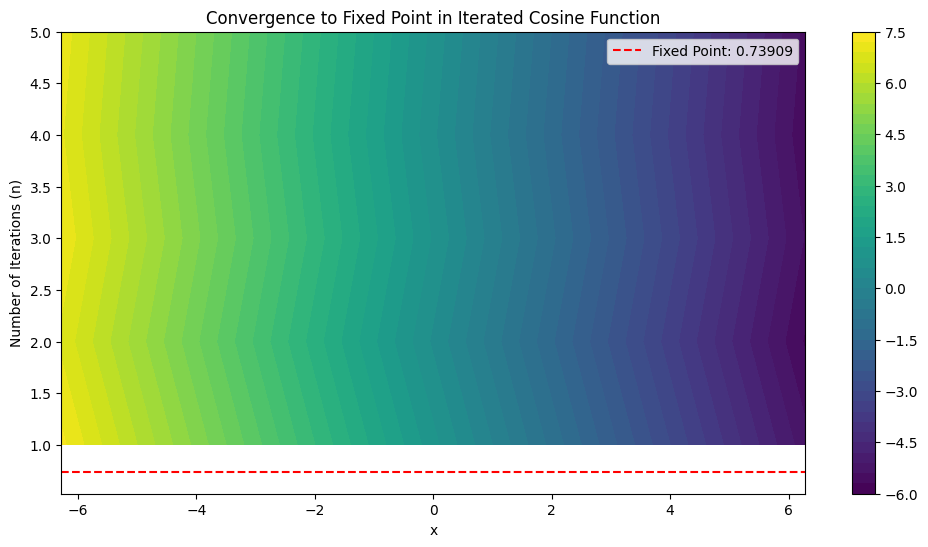

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def find_fixed_points(func, start_points):
    """ Find fixed points of a function """
    fixed_points = set()
    for point in start_points:
        # Find a solution to func(x) = x
        fixed_point, = fsolve(lambda x: func(x) - x, point)
        fixed_points.add(fixed_point)
    return list(fixed_points)

def iterated_cosine_vectorized(x, n):
    """ Apply cosine function iteratively for a vector of iteration counts """
    result = np.zeros_like(x)
    for i in range(n.max()):
        result = np.where(i < n, np.cos(result), result)
    return result

# Find fixed points for the cosine function
start_points = np.linspace(-2, 2, 10)  # Initial guesses
fixed_points_cosine = find_fixed_points(np.cos, start_points)

# Define the range for x and the number of iterations
x = np.linspace(-2*np.pi, 2*np.pi, 400)
n_iterations = np.arange(1, 6)  # Up to 5 iterations

# Prepare the data for the contour plot
X, N = np.meshgrid(x, n_iterations)
Z = iterated_cosine_vectorized(X, N) - X

# Create the contour plot
plt.figure(figsize=(12, 6))
contour = plt.contourf(X, N, Z, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.title("Convergence to Fixed Point in Iterated Cosine Function")
plt.xlabel("x")
plt.ylabel("Number of Iterations (n)")
plt.axhline(y=fixed_points_cosine[0], color='r', linestyle='--', label=f'Fixed Point: {fixed_points_cosine[0]:.5f}')
plt.legend()
plt.show()


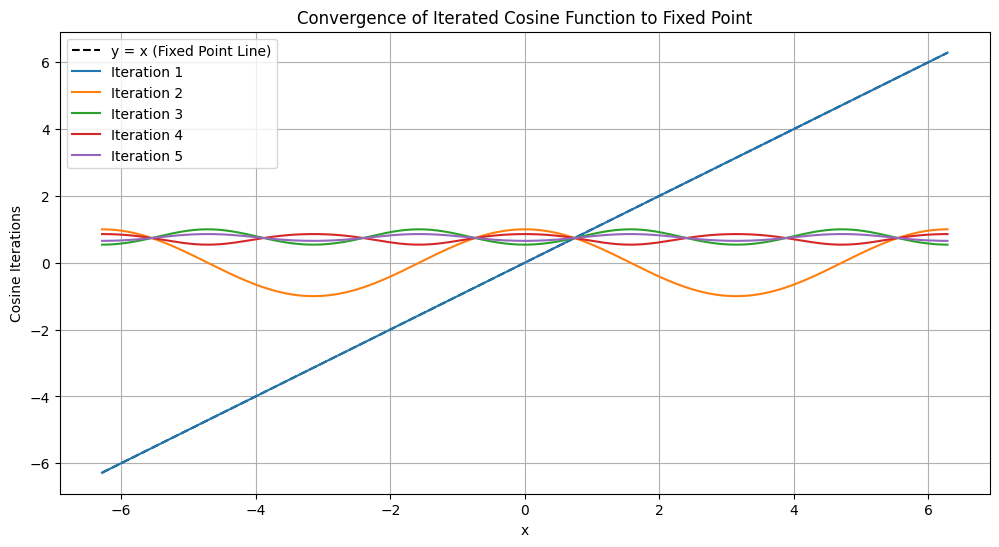

In [13]:
def iterated_cosine(x, n):
    """ Apply cosine function iteratively for a scalar number of iterations """
    for _ in range(n):
        x = np.cos(x)
    return x

# Create the line plot
plt.figure(figsize=(12, 6))

# Plot y = x line representing the fixed point
x_values = np.linspace(-2*np.pi, 2*np.pi, 400)
plt.plot(x_values, x_values, label='y = x (Fixed Point Line)', color='black', linestyle='--')

# Plot the iterated cosine function for different iterations
for n in range(5):  # Up to 5 iterations
    y_values = [iterated_cosine(x, n) for x in x_values]
    plt.plot(x_values, y_values, label=f'Iteration {n+1}')

plt.title("Convergence of Iterated Cosine Function to Fixed Point")
plt.xlabel("x")
plt.ylabel("Cosine Iterations")
plt.legend()
plt.grid(True)
plt.show()



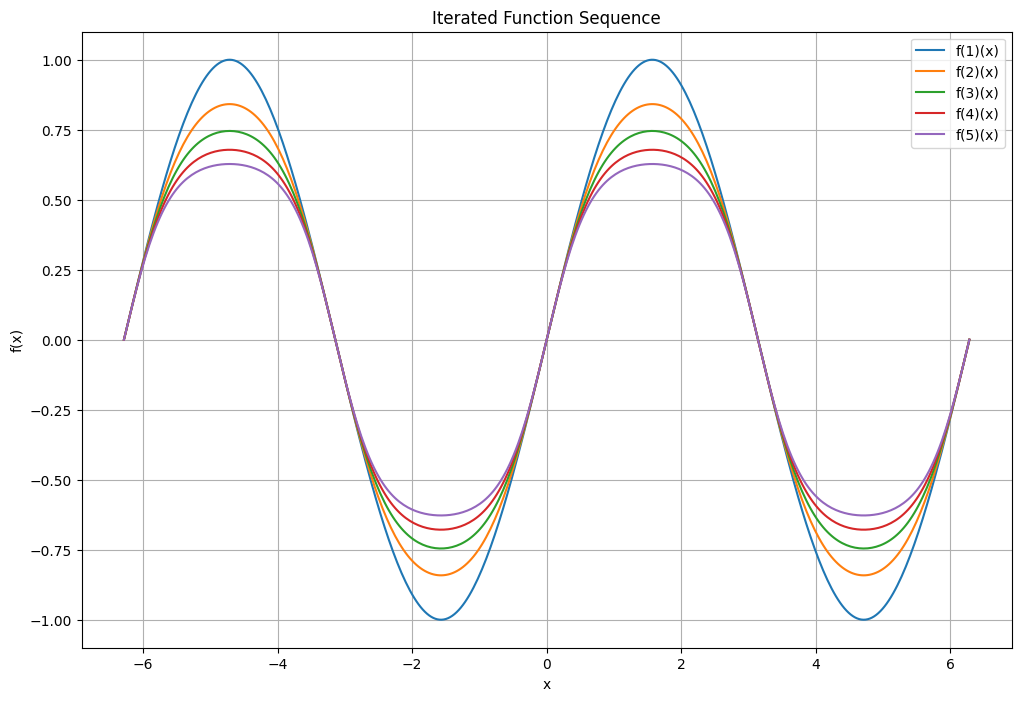

In [14]:
# Example with cosine function
base_func = np.sin
num_terms = 5
x_range = (-2*np.pi, 2*np.pi)  # Range of x values
iterated_function_sequence(base_func, num_terms, x_range)

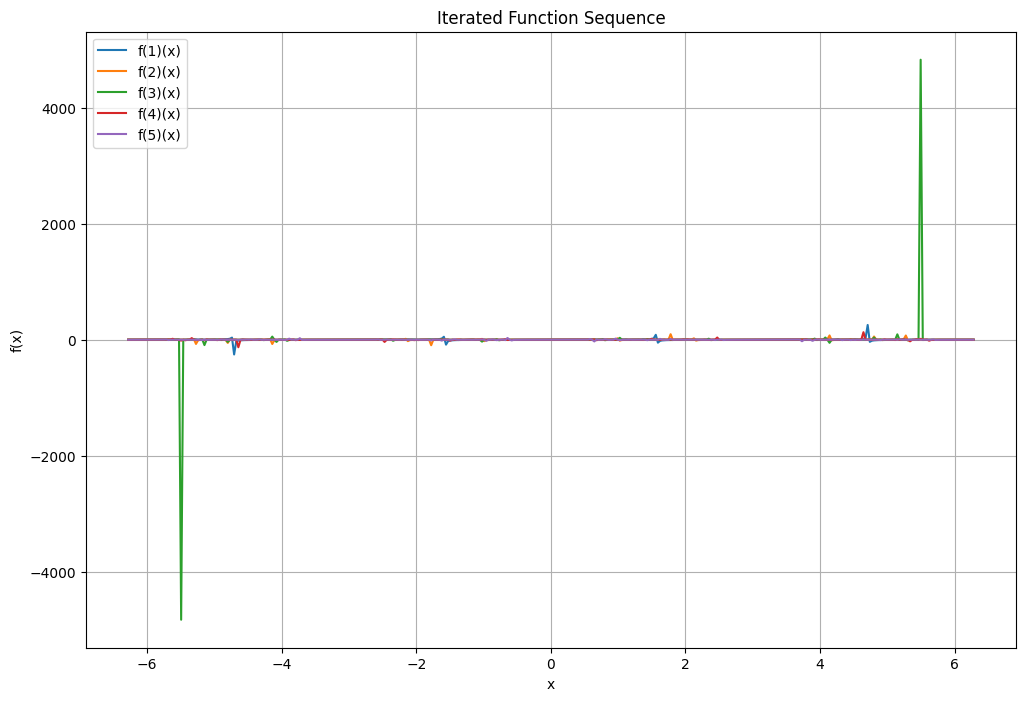

In [15]:
# Example with cosine function
base_func = np.tan
num_terms = 5
x_range = (-2*np.pi, 2*np.pi)  # Range of x values
iterated_function_sequence(base_func, num_terms, x_range)